In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [39]:
dbase = pd.read_csv('/home/al/projects/twitter/jays.csv')

In [40]:
dbase.set_index('created_at', drop=False, inplace=True)

In [5]:
#dbase.index

In [6]:
#dbase.head()

In [7]:
dbase.describe()

,_id,name,text,created_at,source,location,geo,screen_name
count,16186,16186,16186,16186,16186,11757,279,16186
unique,16186,6594,9673,5464,127,2795,199,6817
top,ObjectID(550793897e9aed18979047d5),Toronto BlueJays,RT @MLBMeme: Twitter has been around since 200...,2015-03-10 13:35,Twitter for iPhone,Toronto,"{ ""type"" : ""Point"", ""coordinates"" : [ 0, 0 ] }",topBlueJays
freq,1,428,230,183,5150,1613,80,428


In [8]:
total_tweets = pd.Series.count(dbase['created_at'])
total_tweets

16186

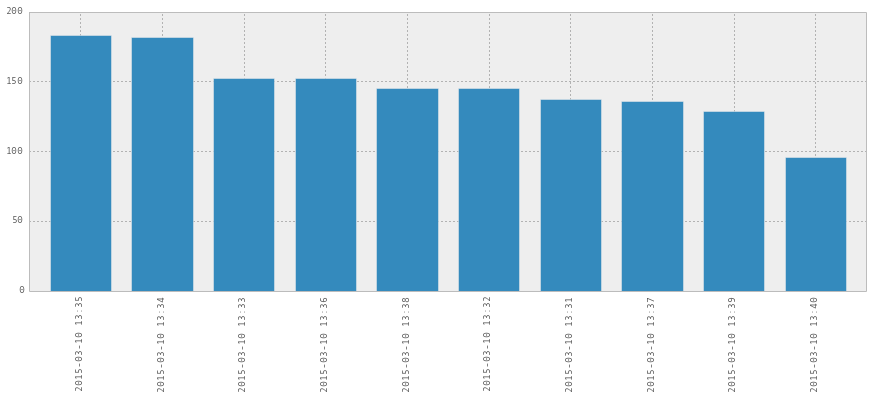

In [38]:
dbase1m = pd.Series.value_counts(dbase['created_at'], normalize=False, sort=True, ascending=False, bins=None)
dbase1m[:10].plot(kind='bar')

In [10]:
#dbase1m.sort_index()

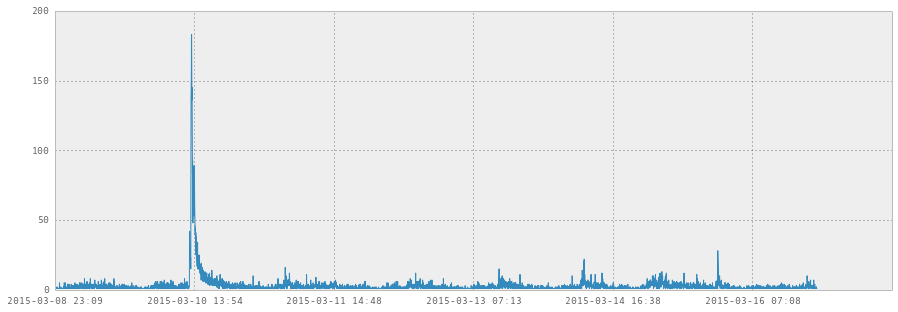

In [11]:
tweet_freq = dbase1m.sort_index()
tweet_freq.plot()

In [12]:
avg = int(dbase1m.mean())
avg

2

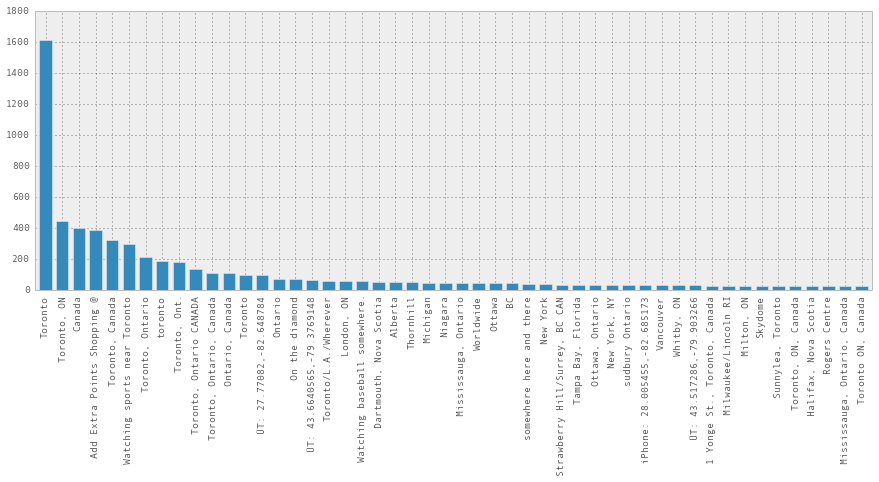

In [13]:
tweeted_from = pd.Series.value_counts(dbase['location'], normalize=False, sort=True, ascending=False, bins=None)
tweeted_from[:50].plot(kind='bar')

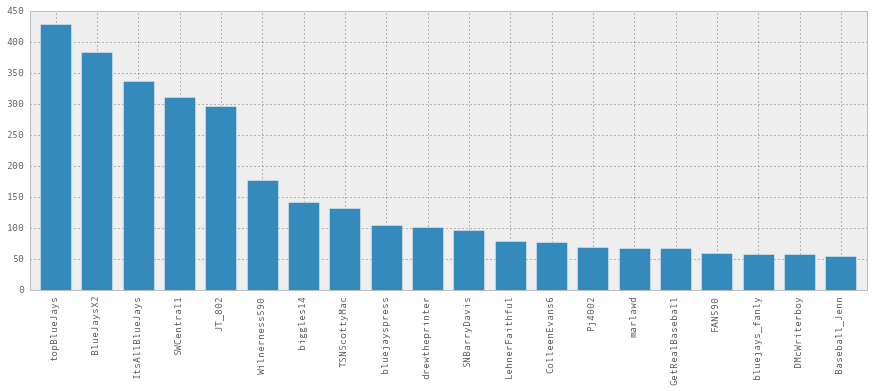

In [27]:
top_tweeter = pd.Series.value_counts(dbase['name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name = pd.Series.value_counts(dbase['screen_name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name[:20].plot(kind='bar')

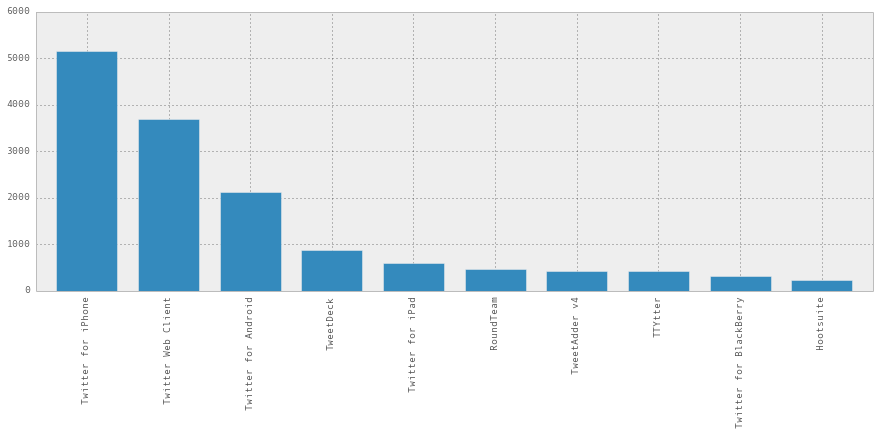

In [15]:
source_tweet = pd.Series.value_counts(dbase['source'], normalize=False, sort=True, ascending=False, bins=None)
source_tweet[:10].plot(kind='bar')

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
stop = stopwords.words('english')
stop2 = stopwords.words('spanish')
otherwords = ['rt', 'vs', '-', '&amp;', '', '#bluejays']
text = dbase['text']
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])

In [37]:
filtered_tokens = [w for w in tokens if not w in stop]
filtered_tokens_spanish = [w for w in filtered_tokens if not w in stop2]
other_filtered = [w for w in filtered_tokens_spanish if not w in otherwords]
freq_dist = nltk.FreqDist(other_filtered)
z = 20
print "The {} most common words tweeted;".format(z)
sorted(freq_dist, key=lambda key: (-freq_dist[key], key))[:z]

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  from IPython.kernel.zmq import kernelapp as app


The 20 most common words tweeted;


['stroman',
 'marcus',
 '#mlb',
 'acl',
 'season',
 'jays',
 'blue',
 'torn',
 '@bnicholsonsmith',
 'today',
 '@wilnerness590',
 'news',
 'game',
 '@snbarrydavis',
 '#jays',
 'injury',
 'anthopoulos',
 'good',
 '@sportsnet',
 'back']

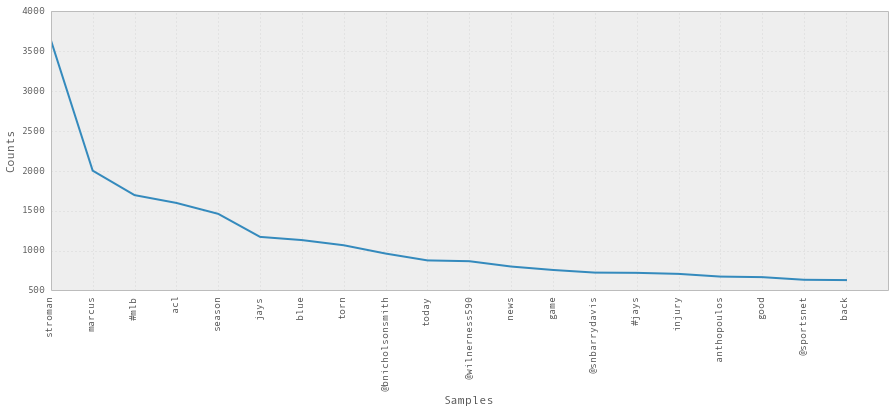

In [36]:
freq_dist.plot(20)

In [19]:
dbase.created_at.value_counts()

2015-03-10 13:35    183
2015-03-10 13:34    182
2015-03-10 13:33    152
2015-03-10 13:36    152
2015-03-10 13:38    145
2015-03-10 13:32    145
2015-03-10 13:31    137
2015-03-10 13:37    136
2015-03-10 13:39    129
2015-03-10 13:40     96
2015-03-10 13:42     93
2015-03-10 13:52     89
2015-03-10 13:43     86
2015-03-10 13:55     84
2015-03-10 13:41     83
...
2015-03-09 21:06    1
2015-03-09 21:04    1
2015-03-12 07:54    1
2015-03-09 21:08    1
2015-03-09 21:09    1
2015-03-12 14:15    1
2015-03-12 14:14    1
2015-03-12 14:13    1
2015-03-13 04:00    1
2015-03-12 16:48    1
2015-03-14 15:55    1
2015-03-14 15:50    1
2015-03-14 15:51    1
2015-03-14 15:52    1
2015-03-11 03:55    1
Length: 5464, dtype: int64

In [20]:
source_geo = pd.Series.value_counts(dbase['geo'], normalize=False, sort=True, ascending=False, bins=None)

In [21]:
#source_geo

In [22]:
import ast
for lines in dbase['geo']:
    if type(lines) == str:
        mylines = ast.literal_eval(lines)
        games_geo_coordinates = mylines["coordinates"]
        print games_geo_coordinates[0],
        print ",",
        print games_geo_coordinates[1]

-88.2272937 , 41.62348186
0 , 0
0 , 0
0 , 0
-79.39412399 , 43.68826059
0 , 0
-107.80836624 , 50.29056654
-80.9300416 , 46.5279807
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
-79.4047014 , 43.6746594
-79.3891065 , 43.64139486
-81.55596535 , 28.33765758
-81.55601259 , 28.33750402
-81.55618847 , 28.33779662
-82.78667345 , 28.00416845
-81.55607125 , 28.33754482
-81.55600408 , 28.33727055
-81.55572491 , 28.33762969
-81.55622461 , 28.33771847
-81.55615288 , 28.33744383
-81.55600746 , 28.33742601
-81.55573379 , 28.33765708
-81.55616759 , 28.33728723
-81.55619998 , 28.33758687
0 , 0
-79.37944038 , 43.65013132
-79.42882961 , 43.6697547
-81.55616389 , 28.33743261
-79.47489414 , 43.64579018
-79.38406243 , 43.66828393
-74.12450616 , 40.61301326
-79.38412896 , 43.66836265
-79.3913704 , 43.8686096
-79.87980369 , 44.74816569
-79.34399555 , 43.73409365
-81.4880278 , 28.45021294
0 , 0
-80.43498453 , 43.45453486
-79.57827642 , 43.65651445
0 , 0
0 , 0
-80.9299584 , 46.5280322
-80.9299664 , 46.5280449
-79.47957935 , 43

In [23]:
import folium
from collections import namedtuple
filepath = "/home/al/projects/twitter/csv/jaysgeo.html"
na_coordinates = (43.641438,-79.389353) # Rogers Centre Toronto, Ontario
na_map = folium.Map(location=na_coordinates, zoom_start=4)
Location = namedtuple('Location', ['latitude', 'longitude'])
count_locations = 0

for lines in dbase['geo']:
    if type(lines) == str:
        count_locations += 1
        mylines = ast.literal_eval(lines)
        games_geo_coordinates = mylines["coordinates"]
        location = Location(games_geo_coordinates[1], games_geo_coordinates[0])
        na_map.circle_marker(location, popup=str(location))

na_map.create_map(filepath)

In [24]:
print str(count_locations) + " users reporting coordinates"
print str(total_tweets) + " total tweets"
percent = round(float(count_locations) / float(total_tweets) * 100, 2)
print str(percent) + "%"

279 users reporting coordinates
16186 total tweets
1.72%
